In [148]:
import matplotlib.pyplot as plt
import numpy as np
import json
import sys
import pandas as pd
from matplotlib import rcParams
from operator import itemgetter

#1 argument = le nom du fichier de transcription au format json
#représentation graphique du score de confiance en fonction du mot, time

In [149]:
#extraction des informations du fichier json de transcription par paty
#exemple avec VITISPROHIBITAEXTRAIT4_asr_reco.json
nomfichier = "patyTranscription/VITISPROHIBITAEXTRAIT4_asr_reco.json"
with open(nomfichier) as json_data:
    data_dict = json.load(json_data)
confidenceMoy = data_dict["confidence-score"]
words = data_dict["speakers"]
data = [] #stock les data
for i in range(0, len(words)):
    for j in range(len(words[i]["words"])):
        words[i]["words"][j]["speaker"] = "spk" + str(i)
        data.append(words[i]["words"][j])

In [150]:
#mettre en ordre chronologique croissant par key "start" 
sortedtime = sorted(data, key=lambda d: d['start'])

listConf = []
listWord = []
listTime = []
abscisse = []
listT = []
for i in range(len(sortedtime)):
    listConf.append(sortedtime[i]["conf"])
    listWord.append(sortedtime[i]["word"])
    listTime.append( (sortedtime[i]["start"], sortedtime[i]["end"]) )
    listT.append(sortedtime[i]["start"])
    abscisse.append( str(listTime[i][0]) + "\n" + sortedtime[i]["speaker"] + ": " + str(listWord[i] ) )
    #print(abscisse[i])
    #print("\n")
#print(listConf)
#print(listWord)
#print(listTime)
npConf = np.array(listConf)
npWord = np.array(listWord)
npAbscisse = np.array(abscisse)
npTime = np.array(listTime)
npT = np.array(listT)

In [151]:
print("Fichier transcrit : " + nomfichier )
print("Score de confience moyen : " + str(confidenceMoy))
print("Affichage confience en fonction des mots transcrits :")


Fichier transcrit : patyTranscription/VITISPROHIBITAEXTRAIT4_asr_reco.json
Score de confience moyen : 0.81830894947052
Affichage confience en fonction des mots transcrits :


[]

<Figure size 1600x14400 with 0 Axes>

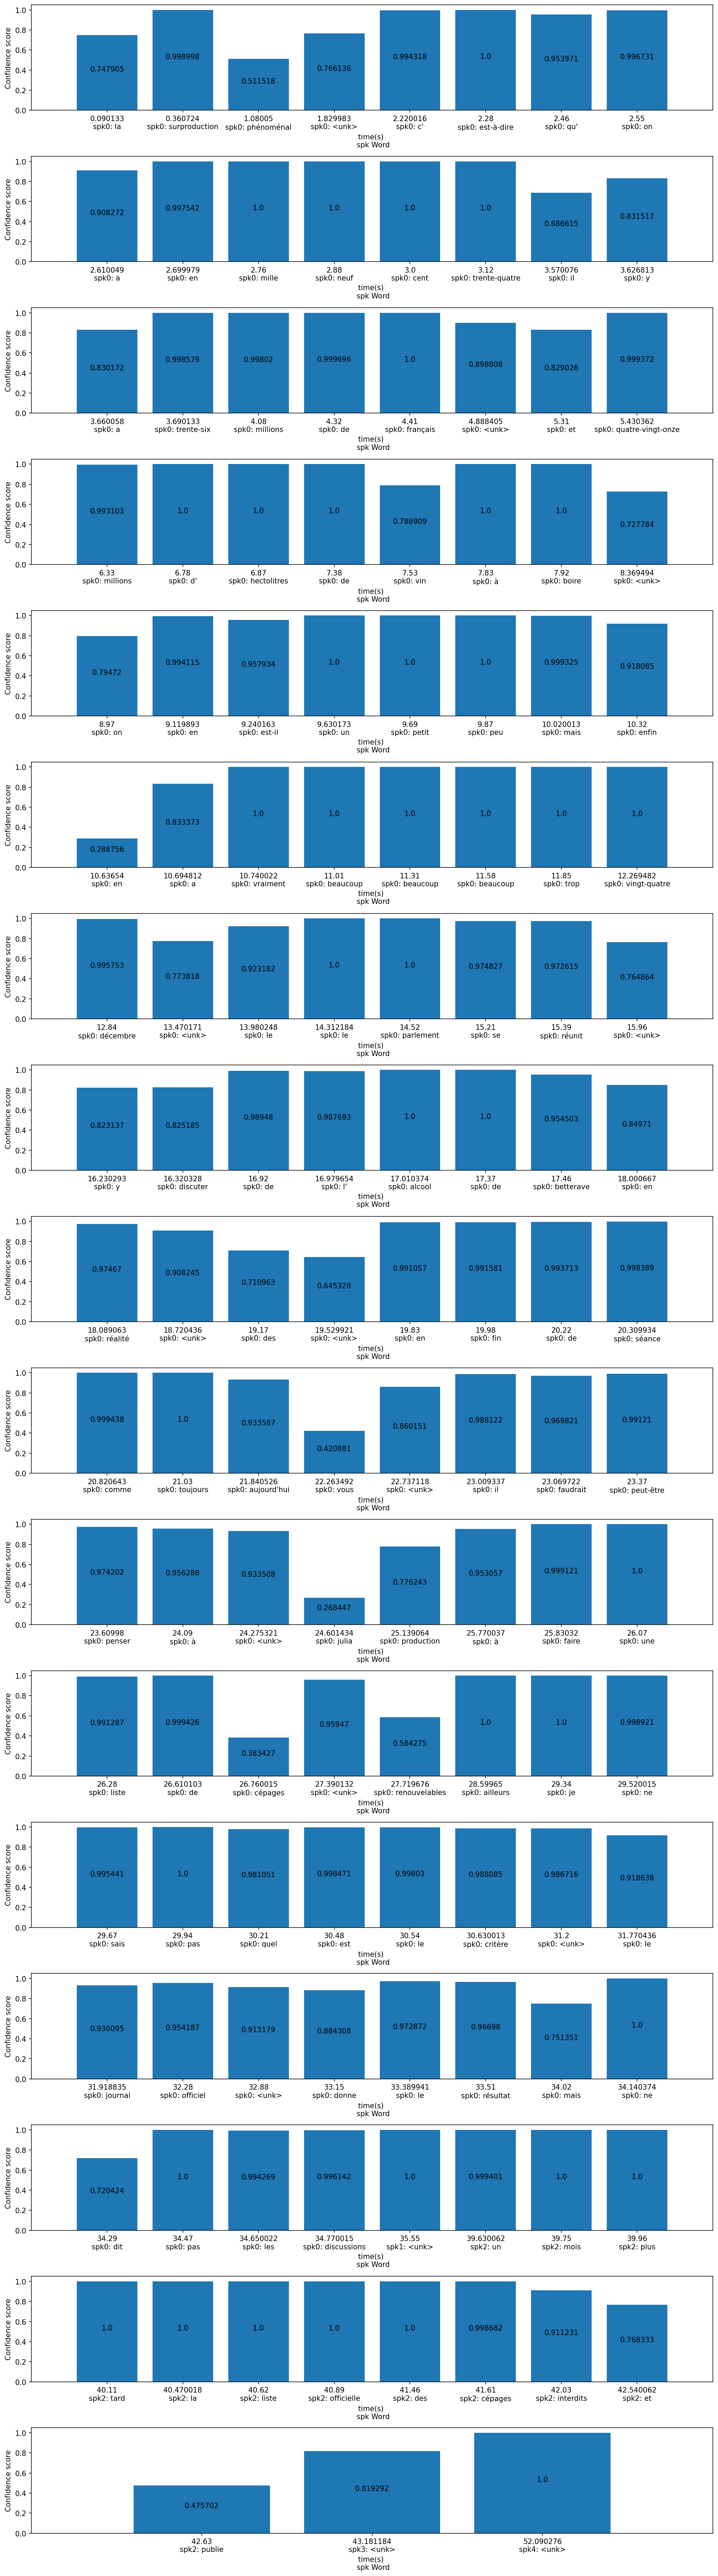

In [152]:
###plot du graphe mise en forme grace au 3 list

#nb de mot par sous graphe
N = 8

rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(2,18), dpi=800)
    
#division des list en sous list pour plot
sublists_Abs = [npAbscisse[x:x+N] for x in range(0, len(npAbscisse), N)]
sublists_Conf = [npConf[x:x+N] for x in range(0, len(npConf), N)]

size = int(len(npConf))
fig, axs = plt.subplots(nrows=size//N+1, sharey=True, figsize=(14,50), dpi=150)
#fig.suptitle('Score de confience en fonction du mot transcrit', size = 25)

for ax, names, values in zip(axs, sublists_Abs, sublists_Conf):
    bar_plot = ax.bar(names, values, align ='center')
    ax.set_xlabel('time(s) \n spk Word')
    ax.set_ylabel('Confidence score')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation='horizontal')
    ax.set_xlim(-1, len(names))
    ###ajout score dans les barres
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height, values[idx], ha='center', va='bottom', rotation=0)
plt.plot()